In [57]:
import pandas as pd
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv', low_memory=False)

matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


In [6]:
matches.drop(['umpire1', 'umpire2', 'umpire3', 'venue'], axis=1, inplace=True)

matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey


## Let's see how many times a Winner Team won the toss

In [9]:
matches['winner'][matches['toss_winner'] == matches['winner']].value_counts()

Chennai Super Kings            42
Mumbai Indians                 41
Kolkata Knight Riders          38
Rajasthan Royals               34
Royal Challengers Bangalore    33
Delhi Daredevils               28
Kings XI Punjab                26
Deccan Chargers                19
Sunrisers Hyderabad            14
Gujarat Lions                   6
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

## Let's see the average numbers of run by which KKR wins

In [16]:
round(matches[matches.winner == 'Kolkata Knight Riders'].win_by_runs.mean())

12.0

In [51]:
round(matches[matches.winner == 'Kolkata Knight Riders'].win_by_wickets.mean())

4.0

It appears that on average KKR wins by **12** runs and **4** wickets

# KKR wins analysis based on the toss outcome

#### Let's see how many times the KKR won and also won the toss.

In [47]:
kkr_wins = matches[((matches.team1 == 'Kolkata Knight Riders') | (matches.team2 == 'Kolkata Knight Riders')) & (matches.winner == 'Kolkata Knight Riders') & (matches.toss_winner == 'Kolkata Knight Riders')]


kkr_wins.reset_index(inplace=True, drop=True)


kkr_wins.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,29,2008,Kolkata,2008-05-08,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,5,0,SC Ganguly
1,33,2008,Hyderabad,2008-05-11,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,23,0,SC Ganguly
2,36,2008,Kolkata,2008-05-13,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,23,0,Shoaib Akhtar
3,64,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle
4,109,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla


Let's see how many times KKR won while deciding to **field first**

In [48]:
kkr_wins.winner[kkr_wins.toss_decision == 'field'].count()

23

Let's see how many times KKR won while deciding to **bat first**

In [49]:
kkr_wins.winner[kkr_wins.toss_decision == 'bat'].count()

15

So we see KKR won <i>23</i> matches while deciding to feild first and won <i>15</i> matches while deciding to bat first

##### Let's see how many KKR won while losing the toss

In [50]:
kkr_wins = matches[((matches.team1 == 'Kolkata Knight Riders') | (matches.team2 == 'Kolkata Knight Riders')) & (matches.winner == 'Kolkata Knight Riders') & (matches.toss_winner != 'Kolkata Knight Riders'
)]

kkr_wins.reset_index(inplace=True, drop=True)

kkr_wins.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum
1,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey
2,53,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul
3,107,2009,Centurion,2009-05-18,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,7,BJ Hodge
4,116,2010,Mumbai,2010-03-12,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews


Let's see how many time KKR won while made to **feild first**

In [44]:
kkr_wins.winner[kkr_wins.toss_decision == 'bat'].count()

18

Let's see how many times KKR won while made to **bat first**

In [45]:
kkr_wins.winner[kkr_wins.toss_decision == 'field'].count()

12

So KKR wins <i>18</i> matches while feilding first and <i>12</i> matches while bating first

## Let's see the "Man of Matches"

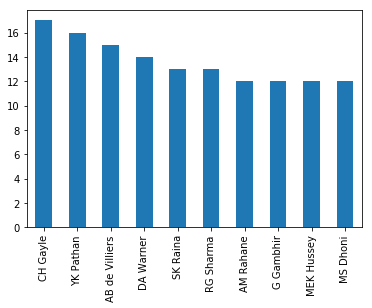

In [59]:
matches.player_of_match.value_counts().head(10).plot(kind='bar')

## Count of the cities matches played

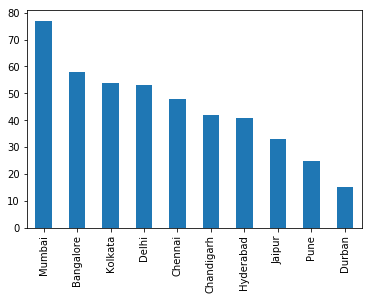

In [63]:
matches.city.value_counts().head(10).plot(kind='bar')

## Count of how times each team won

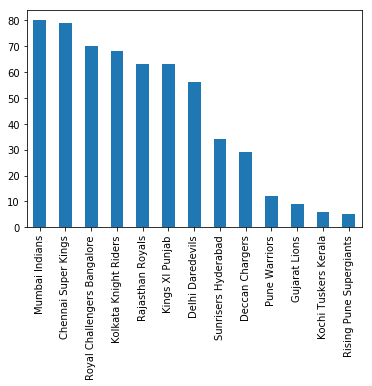

In [64]:
matches.winner.value_counts().plot(kind='bar')